> **Student Names and IDs**:
>
> - Owen Hand, 2686781
> - Celia Vergara, 2600034.

> -When you save your homework as pdf, please DO NOT use "download it as pdf" or "print" directly. Please export it as .html first and then save it to pdf from .html file. Otherwise, jupyter notebook is going to change your formatting. Thanks!

All homework is to be submitted through Gradescope. For each submission, you will submit both a PDF file and a Jupyter notebook. We will usually grade your PDF file only (typically we will **NOT** run your code, so make sure all the results are displayed correctly) and the Jupyter notebook is for backup (if we see something wrong in your code). 

Homework is to be done either individually or in pairs, and working in pairs is strongly encouraged: This helps you discuss concepts and get unstuck when you encounter difficulties. It also helps us return your graded work earlier, since we'll have to read fewer assignments. No other groupings are allowed.

# Homework 1

## Part 1: Practice

### Problem 1.1

What is the amount of disk space required to store a raw RGB image of $1024\times 1024$ pixels in size at a precision of 8-bits? Express your answer in Megabytes.

### Answer
(1 byte) x 1024 x 1024 x 3 = 3MB

### Problem 1.2

Write the "full" **CORRELATION** $J = I \bigotimes I$ of the following $2\times 2$ image with itself, using zero padding. Do _not_ normalize.


$$
I = \left[\begin{array}{cc}1 & 2\\0 & 3 \end{array}\right]
$$

### Answer
\begin{bmatrix}
0 & 0 & 0 & 0\\
0 & 3 & 6 & 0\\
0 & 2 & 14 & 2\\
0 & 0 & 6 & 3\\
\end{bmatrix}

### Problem 1.3

Again, Write the "full" **CONVOLUTION** $J = I \ast I$ of the following $2\times 2$ image with itself, using zero padding. Do _not_ normalize.

$$
I = \left[\begin{array}{cc}1 & 2\\0 & 3 \end{array}\right]
$$

### Answer
\begin{bmatrix}
0 & 0 & 0 & 0\\
0 & 1 & 4 & 4\\
0 & 0 & 6 & 12\\
0 & 0 & 0 & 9\\
\end{bmatrix}

## Part 2: Coding

The following code reads an image and displays it on the screen:

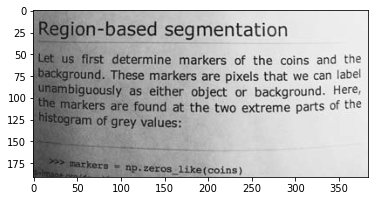

In [1]:
from skimage import data
from matplotlib import pyplot as plt
%matplotlib inline
img = data.page()
plt.imshow(img, cmap='gray')
plt.show()

### Problem 2.1

1.   What are the minimum and maximum pixel values in this image? 
2.   Where do these values occur (give your answer as x-y coordinates)?
3.   Rotate the image by 45 degrees counterclockwise using the bilinear interpolation algorithm implemented in ``skimage`` and show the rotated image.

1. Max:  255
   Min:  0
2. All index values of 255 are:  ((18, 277), (29, 278), (52, 367), (52, 375), (53, 341), (54, 340), (55, 365), (56, 309), (57, 305), (58, 343), (58, 365), (59, 328), (59, 369), (60, 234), (60, 294), (60, 313), (60, 340), (61, 357), (62, 325), (70, 357), (72, 369), (74, 312), (75, 255), (75, 256), (75, 286), (75, 290), (75, 362), (75, 369), (75, 370), (76, 351), (76, 354), (76, 355), (77, 330), (79, 348), (89, 369), (90, 353), (92, 280), (92, 319), (92, 347), (92, 348), (92, 369), (93, 258), (93, 297), (93, 356), (93, 357), (93, 365), (96, 266), (96, 284), (97, 306), (107, 360), (107, 365), (107, 366), (108, 308), (108, 350), (109, 331), (109, 373), (110, 365), (111, 254), (112, 330), (112, 350), (113, 305), (115, 328))
   All index values of 0 are:  ((19, 104), (19, 133), (19, 189), (20, 120), (25, 116), (73, 266), (76, 236), (90, 146), (91, 218))
3.


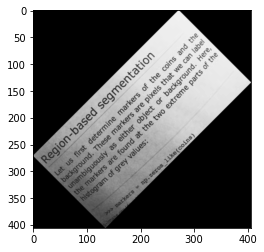

In [2]:
from ctypes import sizeof
from numpy.ma.core import size
import numpy as np
import skimage as sk
import skimage.transform as st
from matplotlib import pyplot as plt

print("1. Max: ", np.max(img))
print("   Min: ", np.min(img))
np.argmax(img)
maxIndices = zip(np.array(np.where(img == 255))[0], np.array(np.where(img == 255))[1])
minIndices = zip(np.array(np.where(img == 0))[0], np.array(np.where(img == 0))[1])

print("2. All index values of 255 are: ", tuple(maxIndices))
print("   All index values of 0 are: ", tuple(minIndices))

plt.imshow(st.rotate(img, 45, resize = True, order = 1), cmap='gray')
print("3.")
plt.show()

### Answer

### Problem 2.2

Write a function with header:

    def normalize(img):
    
that takes an image and re-scales its pixel values to the range [0-1]. Normalize the text image used above (without rotation) and display it. 

### Answer

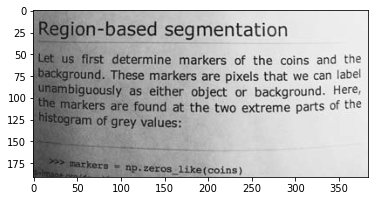

In [3]:
import numpy as np

def normalize(img):
  max = np.max(img)
  min = np.min(img)
  return np.divide(np.subtract(img, min), max)

from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(normalize(img), cmap='gray')
plt.show()

#print(img)
#print(normalize(img))

### Problem 2.3

For the normalized image, write a function to add Gaussian noise with mean $\mu = 0$ and standard deviation $\sigma = 0.1$. Make sure the data type of the noise corrupted image is **float32**. Plot the result.

    def add_gaussian_noise(img, mean, sigma):
Then, apply bilateral filter with $\sigma_s = 3, \sigma_r = 1$ and $\sigma_s = 3, \sigma_r = 100$ using ``opencv2`` (here's the documentation link: https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=bilateralfilter#bilateralfilter). Use a diameter of 10 in both cases (this value determines the diameter of each pixel neighborhood used during filtering - in lecture 4, the neighborhood is defined as $S$ in the equation). Plot the filtered images. Compare the performance of bilateral filtering using the two different parameter values and **explain** the differences. 

### Answer




Noisy Image:


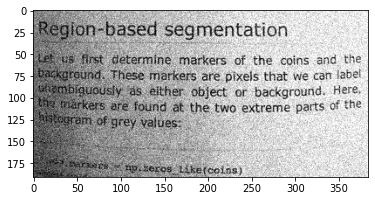

Bilateral Filter with sigmaS = 1, sigma R = 3:


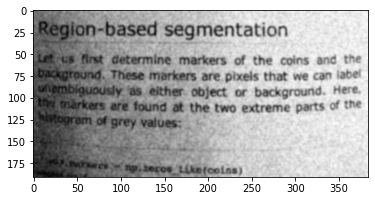

Bilateral Filter with sigmaS = 100, sigma R = 3:


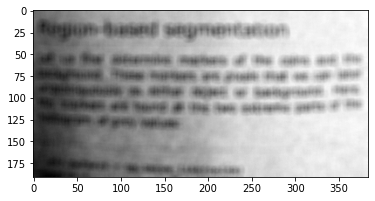

In [4]:
import skimage as sk
from matplotlib import pyplot as plt
import numpy as np
import cv2

def add_gaussian_noise(img, mean, sigma):
  #Variance = SD*SD
  nimg = sk.util.random_noise(img, mode='gaussian', mean = mean, var = sigma*sigma)
  return nimg.astype('float32')

noisy = add_gaussian_noise(normalize(img), 0, 0.1)

%matplotlib inline
print("Noisy Image:")
plt.imshow(noisy, cmap='gray')
plt.show()

bf1 = cv2.bilateralFilter(src = noisy, d = 10, sigmaSpace = 1, sigmaColor = 3)
bf2 = cv2.bilateralFilter(src = noisy, d = 10, sigmaSpace = 100, sigmaColor = 3)

print("Bilateral Filter with sigmaS = 1, sigma R = 3:")
plt.imshow(bf1, cmap='gray')
plt.show()

print("Bilateral Filter with sigmaS = 100, sigma R = 3:")
plt.imshow(bf2, cmap='gray')
plt.show()

The two filtered images seem to be very similar and difficult to distinguish. The parameter σₛ (or `sigmaSpace`) refers to the influence pixel distance has on the weight of a given pixel. A higher σₛ value would lead to further away pixels having a larger influence on the current pixel. The parameter σᵣ (or `sigmaColor`) controls the influence of pixels with different intensity values. A higher σᵣ value leads to pixels with more different values having a larger influence on the result of the current pixel.

### Problem 2.4

In class, we talked about both Gaussian filter (for smoothing) and Laplacian filter (for image sharpening). However, the Laplacian filter as a derivative filter is very sensitive to noise. In order to deal with this, it is common to smooth the image (e.g. using a Gaussian filter) before applying the Laplacian. This two-step process is called the Laplacian of Gaussian (LoG) operation. Now, implement an LoG filter using ``opencv2``'s [cv2.GaussianBlur](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=bilateralfilter#gaussianblur) and [cv2.Laplacian](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=bilateralfilter#laplacian) functions and choosing kernel size = 3 and sigma = 0.1.



    def LoG(img, kernel, sigma):
    


### Answer

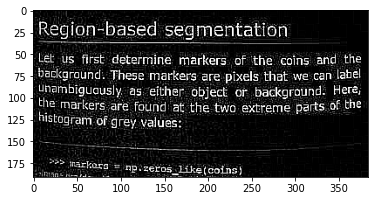

In [5]:
def LoG(img, kernel, sigma):
  gimg = cv2.GaussianBlur(src = img, ksize = [kernel,kernel], sigmaX = sigma)
  limg = cv2.Laplacian(src = gimg, ksize = kernel, ddepth = -1)
  return limg

plt.imshow(LoG(img, 3, 0.1), cmap='gray')
plt.show()

Next, sharpen the bilateral filtered image obtained in **2.3** ($\sigma_s = 3, \sigma_r = 1$) using the LoG function above and the formula given in class: $s(x,y)=f(x,y)+c[\nabla^2 f(x,y)]$. Set $c = -0.3$. Display the sharpened image.




### Answer

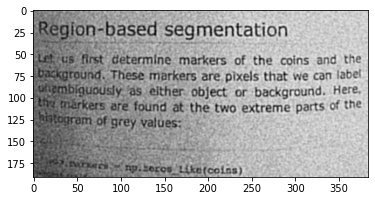

In [6]:
#having issues here (should be fixed ?)
deriv = LoG(bf1, 3, 0.1)
sharp = np.add(bf1, np.multiply(deriv, -.3))

plt.imshow(sharp, cmap='gray')
plt.show()

In class, we talked about color images in RGB space. An interesting variable to tweak when working with color images is the color space we use to represent them. This is important because different color spaces have different properties. In particular, remember that bilateral filtering relies on calculating the difference in intensity between pixels. It turns out that the Euclidean distance between RGB channels isn't always the best way to do that. An interesting experiment to try is to do denoising using different color spaces and seeing how the results change.

We will be using the following color image for the remaining problems.




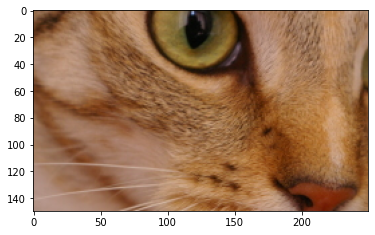

In [7]:
cat_img = data.chelsea()[100:250, 50:300]

plt.imshow(cat_img)
plt.show()

### Problem 2.5
Normalize the cat image to the range $[0,1]$ (use the code from **2.2**). Add Poisson noise to the image using ``skimage``. (Here's the documentation: https://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise). Plot the result.

### Answer

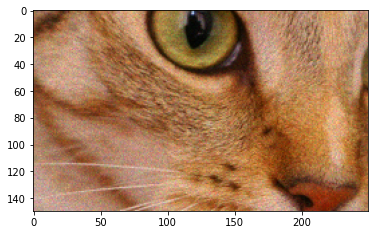

In [8]:
noisy_cat = sk.util.random_noise(normalize(cat_img), mode='poisson')

plt.imshow(noisy_cat)
plt.show()

The following function displays a color image and its corresponding channels:

In [9]:
def channel_demonstration_plot(threechannel_image):
    fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
    ax = axes.ravel()
    ax[0].imshow(threechannel_image)
    ax[0].set_title("Original image")
    ax[1].imshow(threechannel_image[:, :, 0], cmap='gray'); ax[1].set_title("Channel 1")
    ax[2].imshow(threechannel_image[:, :, 1], cmap='gray'); ax[2].set_title("Channel 2")
    ax[3].imshow(threechannel_image[:, :, 2], cmap='gray'); ax[3].set_title("Channel 3")
    for a in ax.ravel():
        a.axis('off')
    fig.tight_layout()

### Problem 2.6
Convert the cat image to YCbCr color space using ``skimage`` and use the code above to plot each channel. **Note**: ``imshow`` requires that the dynamic range of the channels be set to [0,1]. Comment on the differences between the RGB and YCbCr color spaces.

### Answer

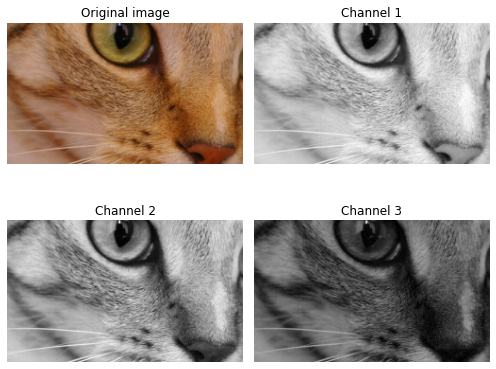

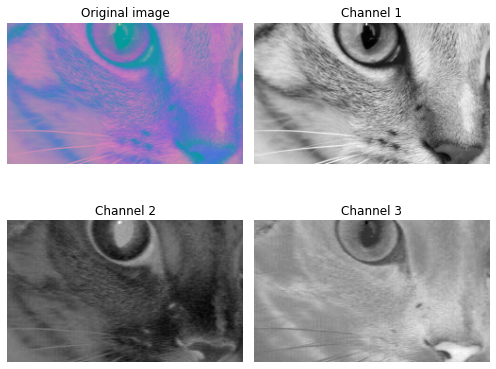

In [10]:
channel_demonstration_plot(cat_img)

imgYCbCr = sk.color.rgb2ycbcr(rgb = cat_img)

channel_demonstration_plot(normalize(imgYCbCr))

All of the RGB color channels look like they could be a grayscale version of the original photo, just with different levels of brightness and contrast (with channel 1 being the lightest and channel 3 being the darkest). None of the YCbCR channels look similar to each other. Channel 1 looks like a grayscale version of the original, while Channel 2 looks like a version in which some of the light and dark colors are swapped. Channels 2 and 3 also look like inverted versions of one another. Additionally, some detail is lost in both channels 2 & 3. Channel 3 also appears to be brightest at some of the red/orange portions of the original RGB photo — while channel 2 appears to be darkest in these portions.

### Problem 2.7
Now, apply bilateral denoising to the noise-corrupted image obtained in **2.5** both in the RGB and YCbCr color spaces (you may need to adjust the parameters to obtain good results).

Show the  denoised images using the RGB and YCbCr color spaces and **comment** on the differences. 

### Answer

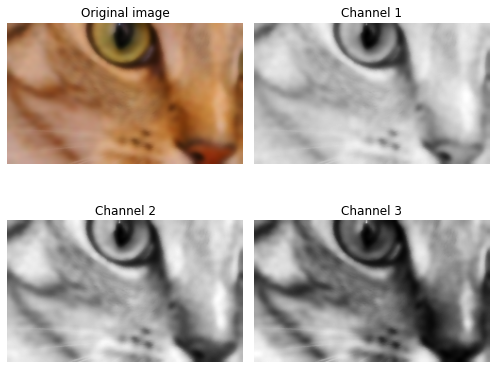

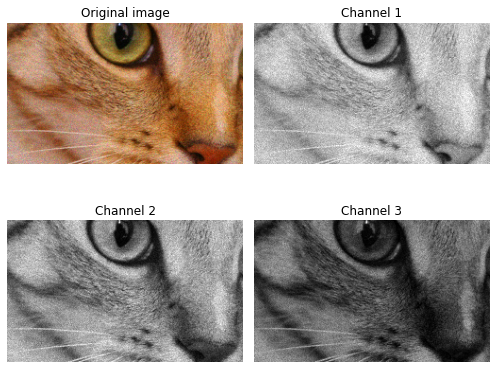

In [23]:
cat_img_de = cv2.bilateralFilter(src = noisy_cat.astype('float32'), d = 10, sigmaSpace = 3, sigmaColor = 1)
channel_demonstration_plot(cat_img_de)


# convert noisy cat image to ycbcr, then denoise
noisy_ycbcr = sk.color.rgb2ycbcr(noisy_cat).astype("float32")
denoised_ycbcr = cv2.bilateralFilter(src = noisy_ycbcr, d = 10, sigmaSpace = 3, sigmaColor = 1)

# convert back to RGB color
channel_demonstration_plot(sk.color.ycbcr2rgb(denoised_ycbcr))

The YCbCr denoised image is much sharper than the RGB denoised image.
The RGB image looks unfocused and blurry, while the YCbCr image displayed is in sharp relief and details such as fur texture, eye texture, and the shape of the cat's markings are easy to see. In fact, the YCbCr image is nearly indistinguishable from the noisy image that it was supposed to be denoised from. Green/rainbow specks are still easily visible in the fur on the cat's nose, for example. 